In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df_17_18 = pd.read_csv("1718Pcard.csv")
df_16_17 = pd.read_csv("PCard 1617.csv")
df_15_16 = pd.read_csv("PCard Transactions 15-16.txt", sep=',')
df_14 = pd.read_csv("Purchasing Card Data 2014 v1.csv")

In [3]:
df_14.head(2)

,Service Area,Account Description,Creditor,Transaction Date,JV Reference,JV Date,JV Value
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93,20/05/2014,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111,20/05/2014,"6,000.00"


In [4]:
df_15_16.head(2)

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
0,Assurance,Miscellaneous Expenses,43033820 COSTA COFFEE,18/08/2015,5043.0,2
1,Children's Family Services,Miscellaneous Expenses,99 PLUS DISCOUNT MART,08/06/2015,4184.0,29.97


In [5]:
df_16_17.head(2)

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
0,Adults and Communities,Books-CDs-Audio-Video,AMAZON EU,05/12/2016,10510.0,45.00
1,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK MARKETPLACE,05/12/2016,10509.0,426.57


In [6]:
df_17_18.head(2)

,FIN.TRANSACTION DATE,FIN.POSTING DATE,FIN.TRANSACTION AMOUNT,MCH.MERCHANT NAME,MCH.CITY NAME,FIN.ORIGINAL CURRENCY AMOUNT,FIN.ORIGINAL ISO CURRENCY CODE SYMBOL,FIN.INET CONVERSION
0,06/04/17,07/04/17,36.55,TESCO STORE 2296,COLNEY HATCH,36.55,GBP,1.0
1,06/04/17,07/04/17,58.75,AMFBOWLING.CO.UK,01442 840200,58.75,GBP,1.0


In [7]:
df_14.drop(columns=["JV Date"],inplace=True)
df_14.columns = ["Service Area","Account Description","Creditor","Journal Date","Journal Reference","Total"]
# df_17_18.rename(columns={'MCH.MERCHANT NAME': 'Creditor'}, inplace=True)
df_17_18.columns = ["Transaction Date","Journal Date","Total","Creditor","City","Amount","Country_Code","C_ratio"]

In [8]:
print(df_14.shape,df_15_16.shape,df_16_17.shape,df_17_18.shape)
# print(4142 + 3865 + 4582)

(4142, 6) (3865, 6) (4582, 6) (4931, 8)


In [9]:
combined_df = pd.concat([df_14, df_15_16,df_16_17], ignore_index=True)
combined_df.dropna(subset=['Journal Date'], inplace=True)
combined_df["JDate"] = combined_df["Journal Date"].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))
print(type(combined_df["JDate"]))

<class 'pandas.core.series.Series'>


In [10]:
combined_df.head()


,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total,JDate
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93.0,143.81,2014-04-23
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111.0,"6,000.00",2014-04-03
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6.0,309.38,2014-04-02
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7.0,218.76,2014-04-02
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381.0,306,2014-04-15


In [11]:
for index,item in df_17_18.iterrows():
    try: 
        df_17_18.at[index, "Service Area"] = combined_df[combined_df["Creditor"] == item[3]]["Service Area"].unique()[0]
    except:
        None
    try:
        df_17_18.at[index, "Account Description"] = combined_df[combined_df["Creditor"] == item[3]]["Account Description"].unique()[0]
    except:
        None


In [12]:
df_17_18["JDate"] = df_17_18["Journal Date"].apply(lambda x: datetime.strptime(x, "%d/%m/%y"))
df_17_18.head(3)

,Transaction Date,Journal Date,Total,Creditor,City,Amount,Country_Code,C_ratio,Service Area,Account Description,JDate
0,06/04/17,07/04/17,36.55,TESCO STORE 2296,COLNEY HATCH,36.55,GBP,1.0,Childrens Services,Food Costs,2017-04-07
1,06/04/17,07/04/17,58.75,AMFBOWLING.CO.UK,01442 840200,58.75,GBP,1.0,Children's Family Services,Miscellaneous Expenses,2017-04-07
2,10/04/17,11/04/17,40.50,WWW.GOJUMPIN.COM,INTERNET,40.50,GBP,1.0,NaN,NaN,2017-04-11


In [13]:
df = pd.concat([combined_df, df_17_18],ignore_index=True)
df.shape

(17518, 12)

In [14]:
df.head()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total,JDate,Transaction Date,City,Amount,Country_Code,C_ratio
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93.0,143.81,2014-04-23,NaN,NaN,NaN,NaN,NaN
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111.0,"6,000.00",2014-04-03,NaN,NaN,NaN,NaN,NaN
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6.0,309.38,2014-04-02,NaN,NaN,NaN,NaN,NaN
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7.0,218.76,2014-04-02,NaN,NaN,NaN,NaN,NaN
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381.0,306,2014-04-15,NaN,NaN,NaN,NaN,NaN


In [15]:
df.nunique()

Service Area              24
Account Description       67
Creditor                2476
Journal Date             999
Journal Reference      10742
Total                   7990
JDate                    999
Transaction Date         360
City                     516
Amount                  2804
Country_Code               3
C_ratio                   18
dtype: int64

In [16]:
df.isna().sum()

Service Area            1032
Account Description     1032
Creditor                   0
Journal Date               0
Journal Reference       4931
Total                      0
JDate                      0
Transaction Date       12587
City                   12591
Amount                 12587
Country_Code           12587
C_ratio                12587
dtype: int64

In [17]:
df.shape

(17518, 12)

In [18]:
df.columns

Index(['Service Area', 'Account Description', 'Creditor', 'Journal Date',
       'Journal Reference', 'Total', 'JDate', 'Transaction Date', 'City',
       'Amount', 'Country_Code', 'C_ratio'],
      dtype='object')

In [19]:


df['quarter'] = df['JDate'].dt.to_period('Q')

In [20]:
df.tail()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total,JDate,Transaction Date,City,Amount,Country_Code,C_ratio,quarter
17513,NaN,NaN,GIFFGAFF,19/03/18,NaN,20.00,2018-03-19,16/03/18,WWW.GIFFGAFF,20.00,GBP,1.0,2018Q1
17514,Family Services,Private Contractors - Third Pa,LOVE2SHOP.CO.UK,08/03/18,NaN,354.25,2018-03-08,07/03/18,0345 717 1111,354.25,GBP,1.0,2018Q1
17515,Adults and Communities,Training,AMAZON UK MARKETPLACE,22/03/18,NaN,51.88,2018-03-22,21/03/18,800-279-6620,51.88,GBP,1.0,2018Q1
17516,Children's Family Services,Miscellaneous Expenses,WWW.BRENTGOV.UK,26/03/18,NaN,10.00,2018-03-26,22/03/18,INTERNET,10.00,GBP,1.0,2018Q1
17517,Children's Family Services,Miscellaneous Expenses,LUTON BC INTERNET,28/03/18,NaN,11.00,2018-03-28,27/03/18,LUTON,11.00,GBP,1.0,2018Q1


In [21]:
df.head()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total,JDate,Transaction Date,City,Amount,Country_Code,C_ratio,quarter
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93.0,143.81,2014-04-23,NaN,NaN,NaN,NaN,NaN,2014Q2
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111.0,"6,000.00",2014-04-03,NaN,NaN,NaN,NaN,NaN,2014Q2
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6.0,309.38,2014-04-02,NaN,NaN,NaN,NaN,NaN,2014Q2
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7.0,218.76,2014-04-02,NaN,NaN,NaN,NaN,NaN,2014Q2
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381.0,306,2014-04-15,NaN,NaN,NaN,NaN,NaN,2014Q2


In [22]:
df["quarter"].unique()


<PeriodArray>
['2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q3', '2015Q2', '2015Q4',
 '2016Q1', '2016Q4', '2017Q1', '2016Q3', '2016Q2', '2017Q2', '2017Q3',
 '2017Q4', '2018Q1', '2018Q2']
Length: 17, dtype: period[Q-DEC]

In [23]:
df['Total'] = df['Total'].apply(lambda x: x.replace(",",""))
df['Total'] = df['Total'].astype(float)

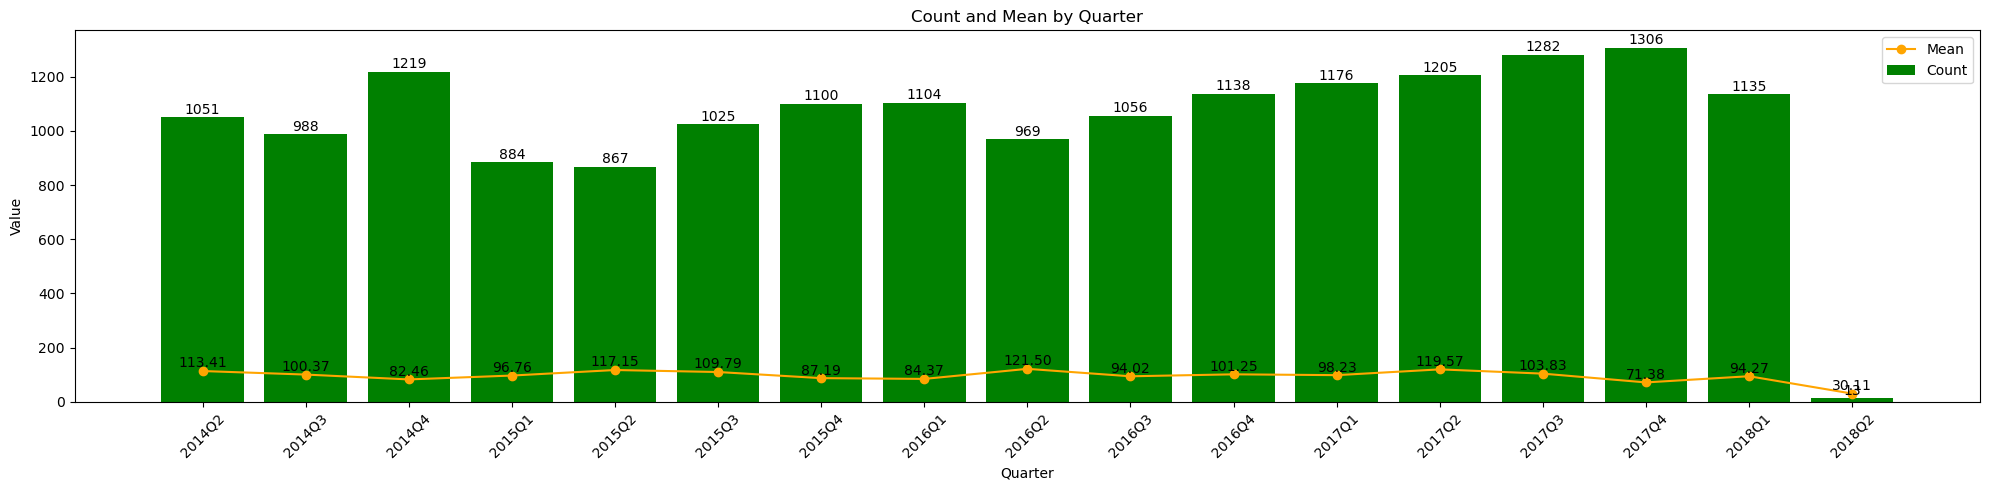

In [46]:
quarterly_stats = df.groupby('quarter')['Total'].agg(['count', 'mean']).reset_index()
plt.figure(figsize=(20, 5))

plt.plot(quarterly_stats['quarter'].astype(str), quarterly_stats['mean'], marker='o', color='orange', label='Mean')

plt.bar(quarterly_stats['quarter'].astype(str), quarterly_stats['count'], color='g', label='Count')

for i, count in enumerate(quarterly_stats['count']):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10)
    
for i, mean in enumerate(quarterly_stats['mean']):
    plt.text(i, mean + 2, '{:.2f}'.format(mean), ha='center', va='bottom', fontsize=10)

plt.title('Count and Mean by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.legend()
# plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [62]:
quarterly_stats = df.groupby('Service Area')['Total'].agg(['count', 'mean']).reset_index()

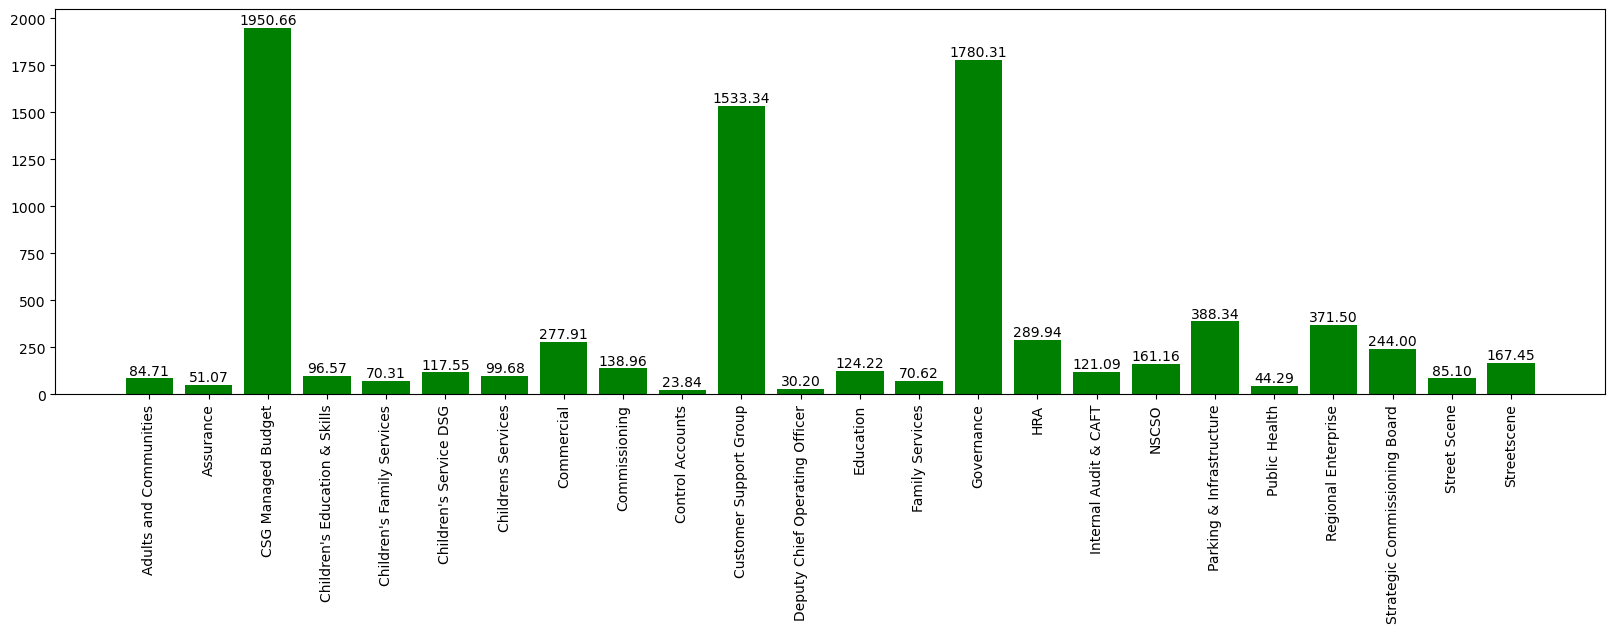

In [66]:
plt.figure(figsize=(20, 5))
plt.bar(quarterly_stats['Service Area'].astype(str), quarterly_stats['mean'], color='g', label='Count')
for i, mean in enumerate(quarterly_stats['mean']):
    plt.text(i, mean + 2, '{:.2f}'.format(mean), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [67]:
Q1 = quarterly_stats['mean'].quantile(0.25)
Q3 = quarterly_stats['mean'].quantile(0.75)
IQR = Q3 - Q1

threshold = Q3 + 1.5 * IQR
spikes = quarterly_stats[quarterly_stats['mean'] > threshold]
print(spikes)

              Service Area  count         mean
2       CSG Managed Budget     37  1950.657838
10  Customer Support Group    123  1533.339106
14              Governance      8  1780.312500


In [68]:
quarterly_stats = df.groupby('Account Description')['Total'].agg(['count', 'mean']).reset_index()

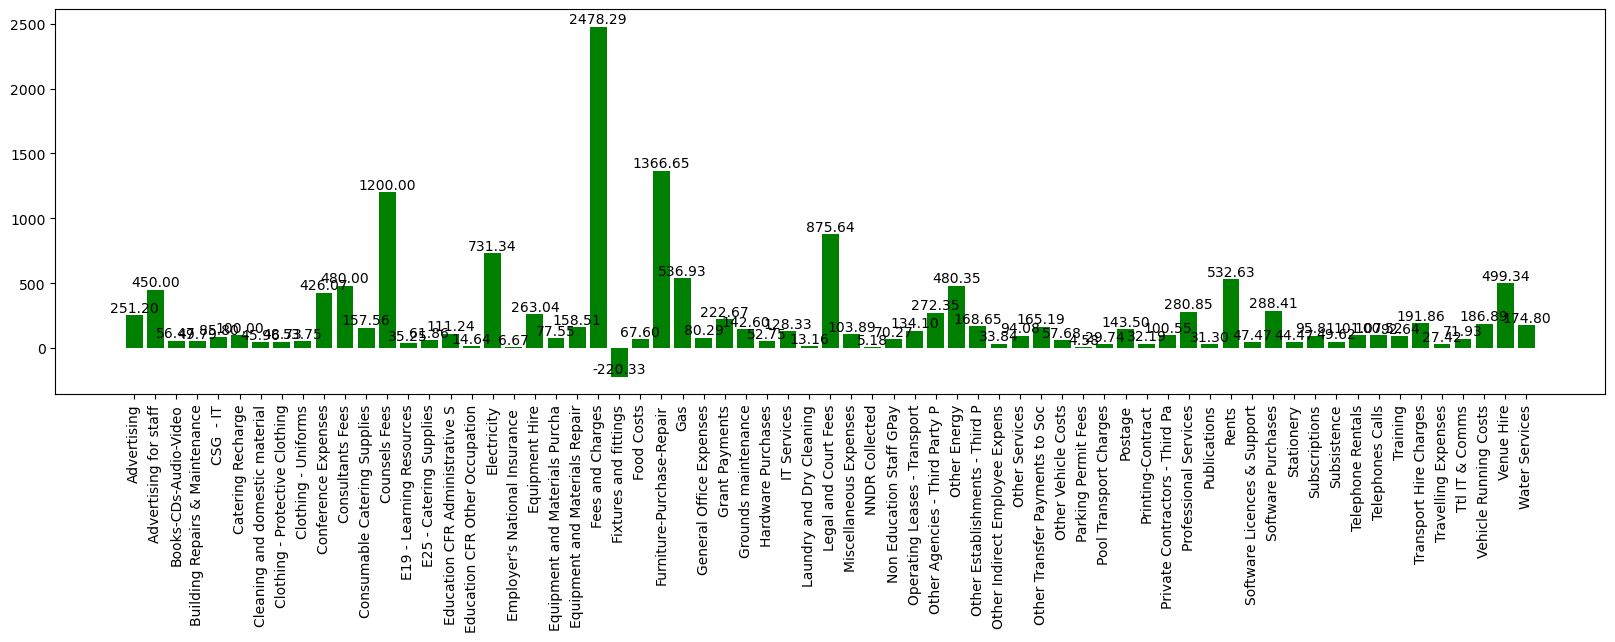

In [69]:
plt.figure(figsize=(20, 5))
plt.bar(quarterly_stats['Account Description'].astype(str), quarterly_stats['mean'], color='g', label='Count')
for i, mean in enumerate(quarterly_stats['mean']):
    plt.text(i, mean + 2, '{:.2f}'.format(mean), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [70]:
Q1 = quarterly_stats['mean'].quantile(0.25)
Q3 = quarterly_stats['mean'].quantile(0.75)
IQR = Q3 - Q1

threshold = Q3 + 1.5 * IQR
spikes = quarterly_stats[quarterly_stats['mean'] > threshold]
print(spikes)

          Account Description  count         mean
12              Counsels Fees      1  1200.000000
17                Electricity      9   731.340000
22           Fees and Charges     28  2478.294286
25  Furniture-Purchase-Repair      3  1366.650000
26                        Gas      7   536.930000
33       Legal and Court Fees    213   875.641268
52                      Rents      8   532.630000


In [79]:
creditor_accounts_count = df.groupby("Creditor")["Account Description"].nunique()
creditor_accounts_count_filtered = creditor_accounts_count[creditor_accounts_count > 1]

# Print creditors and unique accounts if count of unique accounts is greater than 1
for creditor, unique_count in creditor_accounts_count.items():
    if unique_count > 1:
        unique_accounts = df[df['Creditor'] == creditor]['Account Description'].unique()
        print(f"Creditor: {creditor}")
        print("Unique Accounts:")
        for account in unique_accounts:
            print(f"- {account}")
        print()

Creditor: 123-REG.CO.UK
Unique Accounts:
- IT Services
- Subscriptions

Creditor: 99P STORES LTD
Unique Accounts:
- Equipment and Materials Purcha
- E19 - Learning Resources

Creditor: A&Y LOCKSMITHS
Unique Accounts:
- Miscellaneous Expenses
- Clothing - Protective Clothing

Creditor: ABLE GROUP UK
Unique Accounts:
- Private Contractors - Third Pa
- Professional Services

Creditor: ACCESS EXPEDITIONS
Unique Accounts:
- Other Services
- Equipment and Materials Purcha

Creditor: AFE SERVICELINE
Unique Accounts:
- Equipment and Materials Repair
- Private Contractors - Third Pa
- Equipment and Materials Purcha

Creditor: AFFINITY WATER LTD
Unique Accounts:
- Water Services
- Equipment and Materials Purcha
- Miscellaneous Expenses

Creditor: ALDI
Unique Accounts:
- Food Costs
- Training

Creditor: ALEXANDRA PALACE
Unique Accounts:
- Venue Hire
- Other Services

Creditor: ALEXANDRA WEBSITE
Unique Accounts:
- Clothing - Protective Clothing
- Equipment and Materials Purcha
- Publications

Cred

C:\Users\shres\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


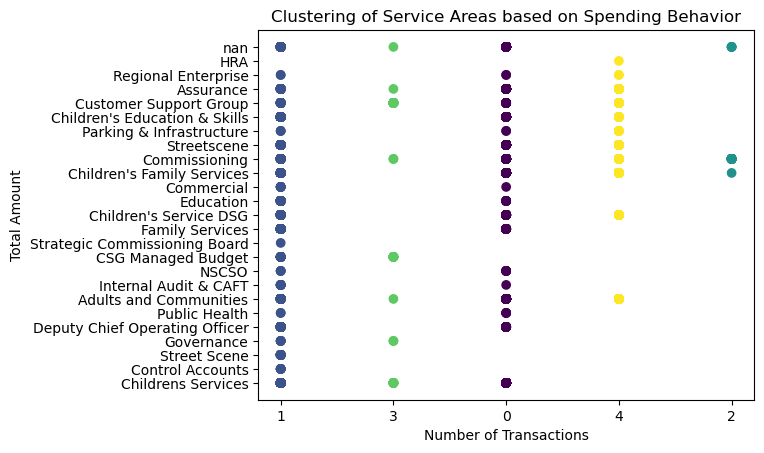

In [97]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

quarterly_stats = df.groupby('Service Area')['Total'].agg(['count', 'mean']).reset_index()

numerical_columns = df.select_dtypes(include=['number'])

X = numerical_columns.fillna(numerical_columns.mean())



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(df["Cluster"].astype(str),df['Service Area'].astype(str),c=df['Cluster'])
plt.xlabel('Number of Transactions')
plt.ylabel('Total Amount')
plt.title('Clustering of Service Areas based on Spending Behavior')
plt.show()

C:\Users\shres\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shres\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


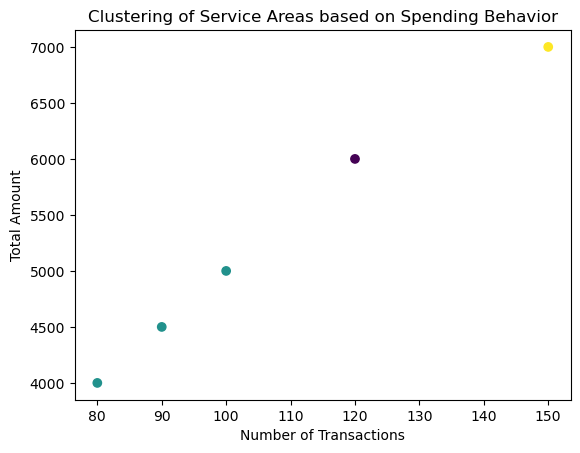

In [98]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sample transaction data
data = {
    "Service Area": ["Area A", "Area B", "Area C", "Area D", "Area E"],
    "Number of Transactions": [100, 150, 80, 120, 90],
    "Total Amount": [5000, 7000, 4000, 6000, 4500],
    "Average Transaction Amount": [50, 47, 50, 55, 50]
}

df = pd.DataFrame(data)

# Select relevant features for clustering
X = df.drop("Service Area", axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(df['Number of Transactions'], df['Total Amount'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Amount')
plt.title('Clustering of Service Areas based on Spending Behavior')
plt.show()